In [2]:
import numpy as np
import pandas as pd
import polars as pl

from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt
from chart_studio import plotly as py
from plotly import graph_objects as go
import plotly.express as px
from plotly.offline import plot, iplot, download_plotlyjs, init_notebook_mode
import cufflinks as cf

%matplotlib inline
init_notebook_mode(connected = True)
cf.go_offline()

pd.options.display.max_columns = 20
pd.options.display.max_rows = 25
pd.options.display.precision = 1

In [5]:
??px.data

Type:        module
String form: <module 'plotly.express.data' from '/Users/sammy/opt/anaconda3/lib/python3.9/site-packages/plotly/express/data/__init__.py'>
File:        ~/opt/anaconda3/lib/python3.9/site-packages/plotly/express/data/__init__.py
Source:     
"""Built-in datasets for demonstration, educational and test purposes.
"""

from __future__ import absolute_import
from plotly.data import *

__all__ = [
    "carshare",
    "election",
    "election_geojson",
    "experiment",
    "gapminder",
    "iris",
    "medals_wide",
    "medals_long",
    "stocks",
    "tips",
    "wind",
]


In [11]:
tips = pl.DataFrame(px.data.tips())

In [12]:
type(tips)

polars.internals.dataframe.frame.DataFrame

In [13]:
tips\
    .lazy()\
        .fetch(3)

total_bill,tip,sex,smoker,day,time,size
f64,f64,str,str,str,str,i64
16.99,1.01,"""Female""","""No""","""Sun""","""Dinner""",2
10.34,1.66,"""Male""","""No""","""Sun""","""Dinner""",3
21.01,3.5,"""Male""","""No""","""Sun""","""Dinner""",3


In [15]:
tips.lazy().collect()

total_bill,tip,sex,smoker,day,time,size
f64,f64,str,str,str,str,i64
16.99,1.01,"""Female""","""No""","""Sun""","""Dinner""",2
10.34,1.66,"""Male""","""No""","""Sun""","""Dinner""",3
21.01,3.5,"""Male""","""No""","""Sun""","""Dinner""",3
23.68,3.31,"""Male""","""No""","""Sun""","""Dinner""",2
24.59,3.61,"""Female""","""No""","""Sun""","""Dinner""",4
25.29,4.71,"""Male""","""No""","""Sun""","""Dinner""",4
8.77,2.0,"""Male""","""No""","""Sun""","""Dinner""",2
26.88,3.12,"""Male""","""No""","""Sun""","""Dinner""",4
15.04,1.96,"""Male""","""No""","""Sun""","""Dinner""",2


In [18]:
tips.columns

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

<AxesSubplot:>

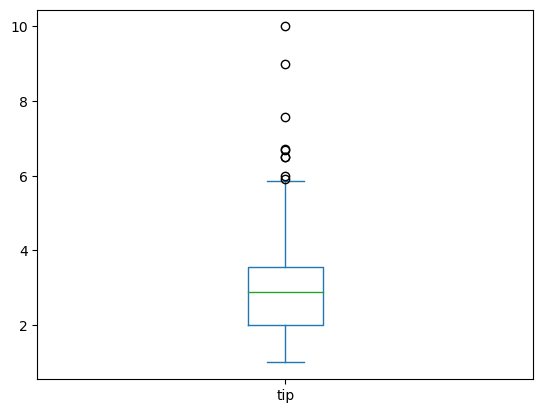

In [39]:
tips\
    .lazy()\
        .select(pl.col('tip'))\
            .collect()\
                .to_pandas()\
                    .plot(kind = 'box')

<AxesSubplot:xlabel='sex'>

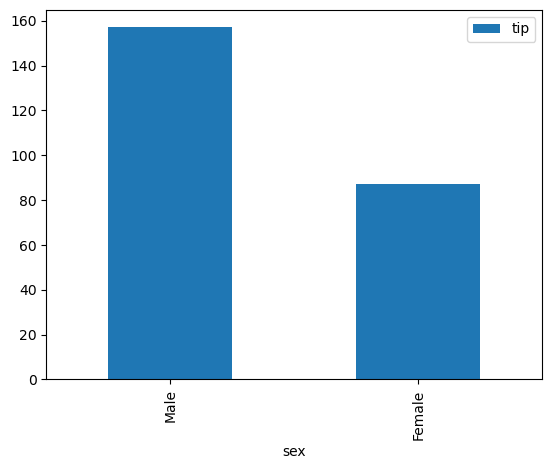

In [47]:
tips\
    .lazy()\
        .select(pl.col(['sex', 'tip']))\
            .groupby(pl.col('sex'))\
                .agg(pl.count('tip'))\
                    .fetch()\
                        .to_pandas()\
                            .set_index('sex')\
                                .plot(kind = 'bar')

In [48]:
tips_df = tips.to_pandas()
tips_pldf = tips

In [51]:
type(tips_df)

pandas.core.frame.DataFrame

In [52]:
type(tips_pldf)

polars.internals.dataframe.frame.DataFrame

In [53]:
tips_df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3
2,21.0,3.5,Male,No,Sun,Dinner,3


<AxesSubplot:xlabel='sex'>

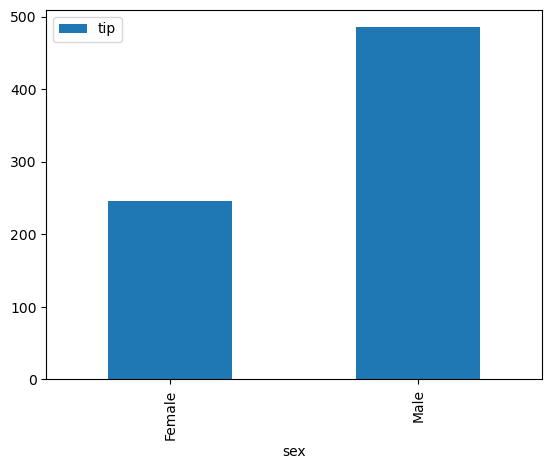

In [60]:
tips_df\
    .loc[:, ['sex', 'tip']]\
        .groupby('sex')\
            .agg('sum')\
                .plot(kind = 'bar')

In [61]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


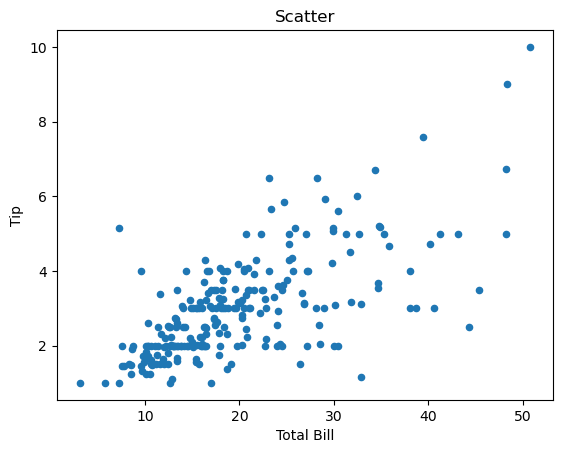

In [72]:
tips_df.loc[:, ['total_bill', 'tip']]\
    .plot(kind = 'scatter', x = 'total_bill', y = 'tip', 
    title = 'Scatter', xlabel = 'Total Bill', ylabel = 'Tip');

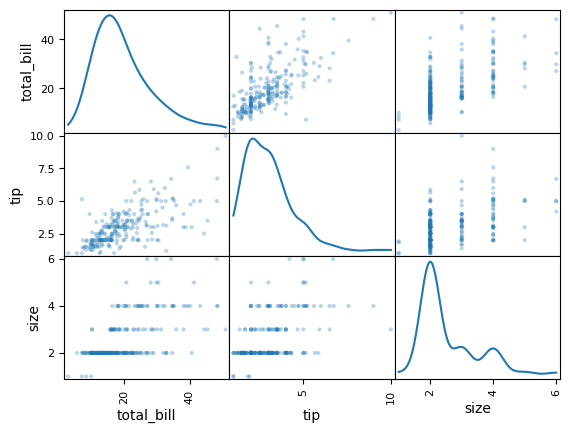

In [77]:
pd.plotting.scatter_matrix(tips_df, diagonal = 'kde', alpha = 0.3);

In [81]:
tips_pldf\
    .lazy()\
        .select(pl.col(['total_bill', 'tip', 'size']))\
            .filter(pl.col('total_bill') >= 15)\
                .groupby('size')\
                    .agg(pl.std('total_bill')).collect()

size,total_bill
i64,f64
5,7.340396
3,9.134863
6,9.382
2,5.242656
4,8.608603


In [90]:
tips_pldf.head()

total_bill,tip,sex,smoker,day,time,size
f64,f64,str,str,str,str,i64
16.99,1.01,"""Female""","""No""","""Sun""","""Dinner""",2
10.34,1.66,"""Male""","""No""","""Sun""","""Dinner""",3
21.01,3.5,"""Male""","""No""","""Sun""","""Dinner""",3
23.68,3.31,"""Male""","""No""","""Sun""","""Dinner""",2
24.59,3.61,"""Female""","""No""","""Sun""","""Dinner""",4


In [95]:
tips_pldf.groupby(by = 'sex').agg([pl.col('day').n_unique(), pl.mean('tip')])

sex,day,tip
str,u32,f64
"""Female""",4,2.833448
"""Male""",4,3.089618
